In [1]:
#setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")


### Data Load

In [2]:
df = pd.read_csv('kyphosis.csv')
print("Data loaded")

Data loaded


In [3]:
df.head()
df['Ky'] = df.Kyphosis.map({'absent':0, 'present':1})

In [4]:
df.head()

,Kyphosis,Age,Number,Start,Ky
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


* Col 0 = Age = months
* Col 1 = Start = starting vertebrae
* Col 2 = Num = number of vertebrae
* Col 3 = Kyphosis = 1 if present, 0 if absent

In [5]:
df = df.drop(['Kyphosis'],axis =1)
df.head()

,Age,Number,Start,Ky
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


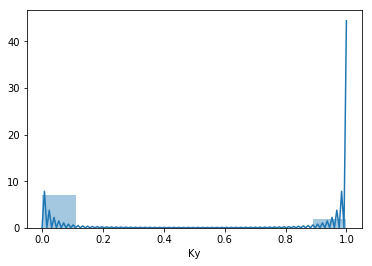

In [6]:
sns.distplot(df['Ky']) ##distribution plot

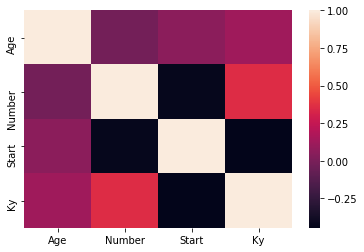

In [7]:
corrmat = df.corr()
sns.heatmap(corrmat) #useless as Kyphosis is categorical now

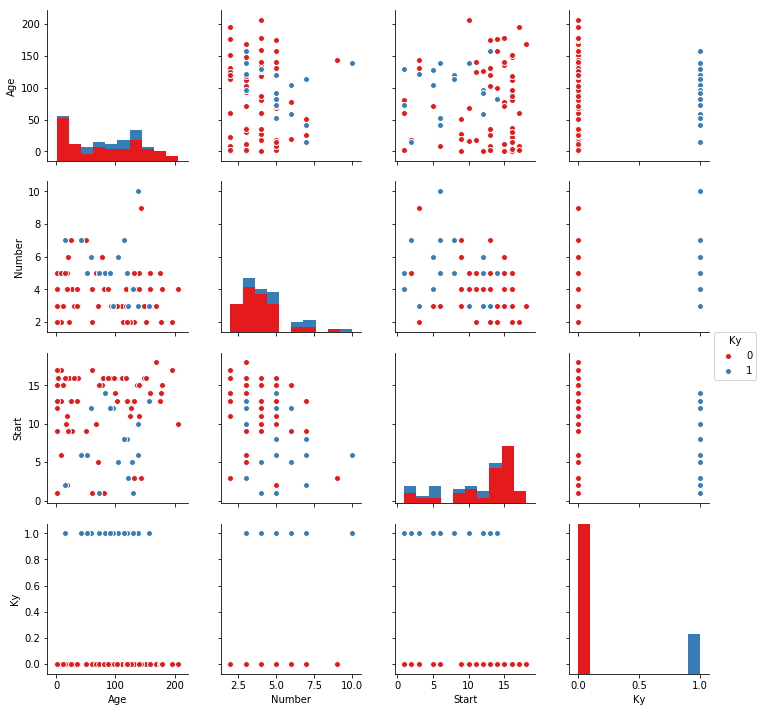

In [8]:
#sns.pairplot(df) #works
#shows distribution of vars and correleation among 2
sns.pairplot(df, hue = 'Ky', palette = 'Set1')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Age       81 non-null int64
Number    81 non-null int64
Start     81 non-null int64
Ky        81 non-null int64
dtypes: int64(4)
memory usage: 2.6 KB


In [10]:
df.describe()

,Age,Number,Start,Ky
count,81.000000,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827,0.209877
std,58.104251,1.619423,4.883962,0.409758
min,1.000000,2.000000,1.000000,0.000000
25%,26.000000,3.000000,9.000000,0.000000
50%,87.000000,4.000000,13.000000,0.000000
75%,130.000000,5.000000,16.000000,0.000000
max,206.000000,10.000000,18.000000,1.000000


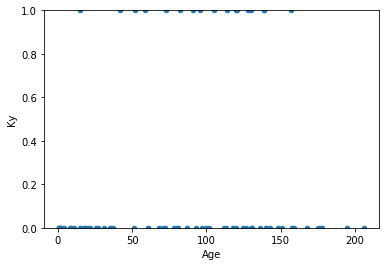

In [11]:
var = 'Age'
data = pd.concat([df[var],df['Ky']],axis = 1)
data.plot.scatter(x = var, y = 'Ky', ylim = (0,1))

(-0.5, 63.5, 0, 1)

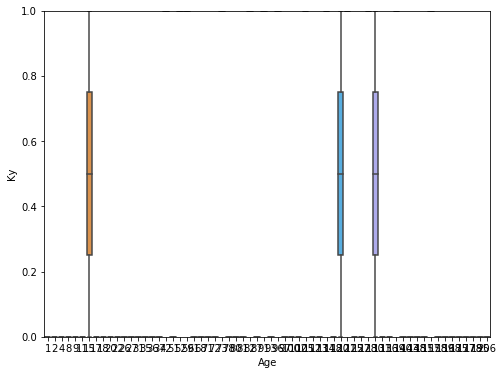

In [12]:
var = 'Age'
data = pd.concat([df[var],df['Ky']],axis = 1)

f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'Ky', data = data)
fig.axis(ymin = 0, ymax = 1)

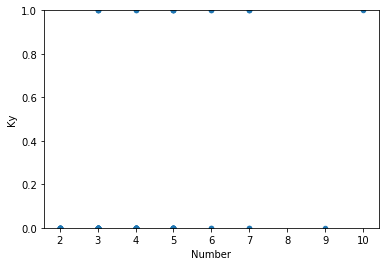

In [13]:
var = 'Number'
data = pd.concat([df['Ky'],df[var]],axis = 1)
data.plot.scatter(x = var, y = 'Ky', ylim= (0,1))

(-0.5, 7.5, 0, 1)

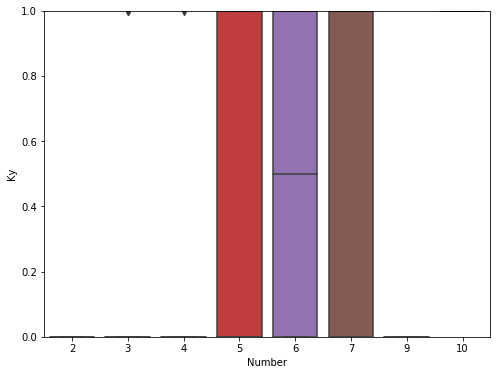

In [14]:
var = 'Number'
data = pd.concat([df['Ky'],df[var]],axis = 1)

f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'Ky', data = data)
fig.axis(ymin = 0, ymax = 1)

In [15]:
df.isnull().sum()

Age       0
Number    0
Start     0
Ky        0
dtype: int64

In [16]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

ky_scaled = StandardScaler().fit_transform(df['Ky'][:,np.newaxis])
##StandardScaler(copy=True, with_mean=True, with_std=True)
#Standardize features by removing the mean and scaling to unit variance

#The standard score of a sample x is calculated as:
#z = (x - u) / s
#where u is the mean of the training samples or zero 
#if with_mean=False, and s is the standard deviation of the training samples 
#or one if with_std=False

#fit_transform(X[, y]) Fit to data, then transform it. 

#np.newaxis might come in handy when you want to explicitly convert a 1D array 
#to either a row vector or a column vector

low_range = ky_scaled[ky_scaled[:,0].argsort()][:10]
high_range = ky_scaled[ky_scaled[:,0].argsort()][:-10]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]]

outer range (high) of the distribution:
[[-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153882]
 [-0.5153

#### Normality

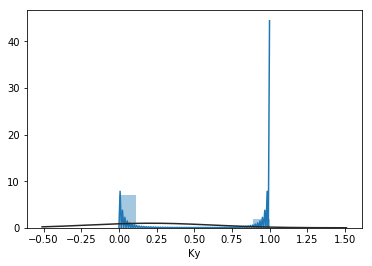

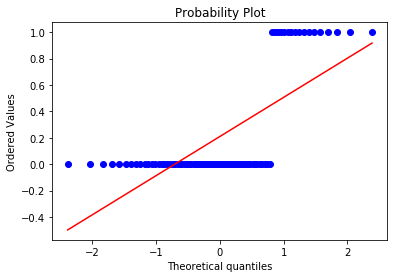

In [17]:
#histogram and normal probability plot
from scipy import stats
from scipy.stats import norm

sns.distplot(df['Ky'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Ky'], plot=plt)

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(['Ky'],axis =1)
y = df['Ky']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 0)
print('Train test splitted')

Train test splitted


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


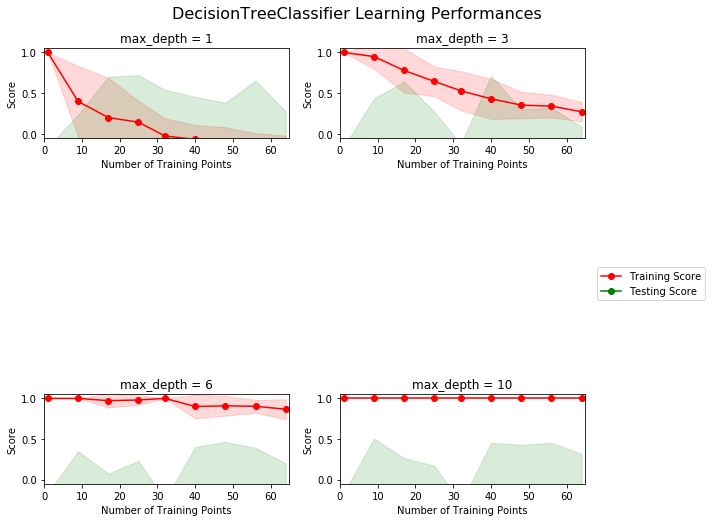

In [23]:
import sklearn.learning_curve as curves
from sklearn.cross_validation import ShuffleSplit
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a DecisionTreeClassifier at max_depth = depth
        regressor = DecisionTreeClassifier(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('DecisionTreeClassifier Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

ModelLearning(X,y)

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
predictions =dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.89      0.86        18
          1       0.67      0.57      0.62         7

avg / total       0.79      0.80      0.80        25



In [28]:
print(confusion_matrix(y_test, predictions))

[[16  2]
 [ 3  4]]


### Tree Visualisation

In [29]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:-1])
features

['Age', 'Number', 'Start']

In [30]:
'''
dot_data =StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True, rounded = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
'''
#Not working. Issues with pydot module

'\ndot_data =StringIO()\nexport_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True, rounded = True)\n\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())\nImage(graph[0].create_png())\n'

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(classification_report(rfc_pred,y_test))

             precision    recall  f1-score   support

          0       0.94      0.77      0.85        22
          1       0.29      0.67      0.40         3

avg / total       0.87      0.76      0.80        25



In [35]:
print(confusion_matrix(rfc_pred,y_test))

[[17  5]
 [ 1  2]]
